In [1400]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime

In [1401]:
df = pd.read_csv('Data_And_Calculations/SUM_DATA.csv')

In [1402]:
df = df.drop('STORE', axis=1)

In [1403]:
df.head()

,SALE_DT,SALES
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [1404]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,2019-01,6.116698e+08
1,2019-02,6.254852e+08
2,2019-03,7.278651e+08
3,2019-04,6.499091e+08
4,2019-05,6.118044e+08


In [1405]:
df.shape

(42, 2)

In [1406]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [1407]:
df.tail()

,Month,Sales
37,2022-02,5.327292e+08
38,2022-03,7.537410e+08
39,2022-04,6.054326e+08
40,2022-05,5.480671e+08
41,2022-06,5.027106e+08


In [1408]:
df.shape

(42, 2)

In [1409]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [1410]:
df['Month'] = pd.to_datetime(df['Month'])

In [1411]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [1412]:
df.head()

,Month,Sales
0,2019-01-01,6.116698e+08
1,2019-02-01,6.254852e+08
2,2019-03-01,7.278651e+08
3,2019-04-01,6.499091e+08
4,2019-05-01,6.118044e+08


In [1413]:
df.set_index('Month', inplace=True)

In [1414]:
df.head()

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08


In [1415]:
df.describe()

,Sales
count,4.200000e+01
mean,5.574131e+08
std,1.139248e+08
min,3.519605e+08
25%,4.789646e+08
50%,5.457878e+08
75%,6.101105e+08
max,8.893998e+08


<Axes: xlabel='Month'>

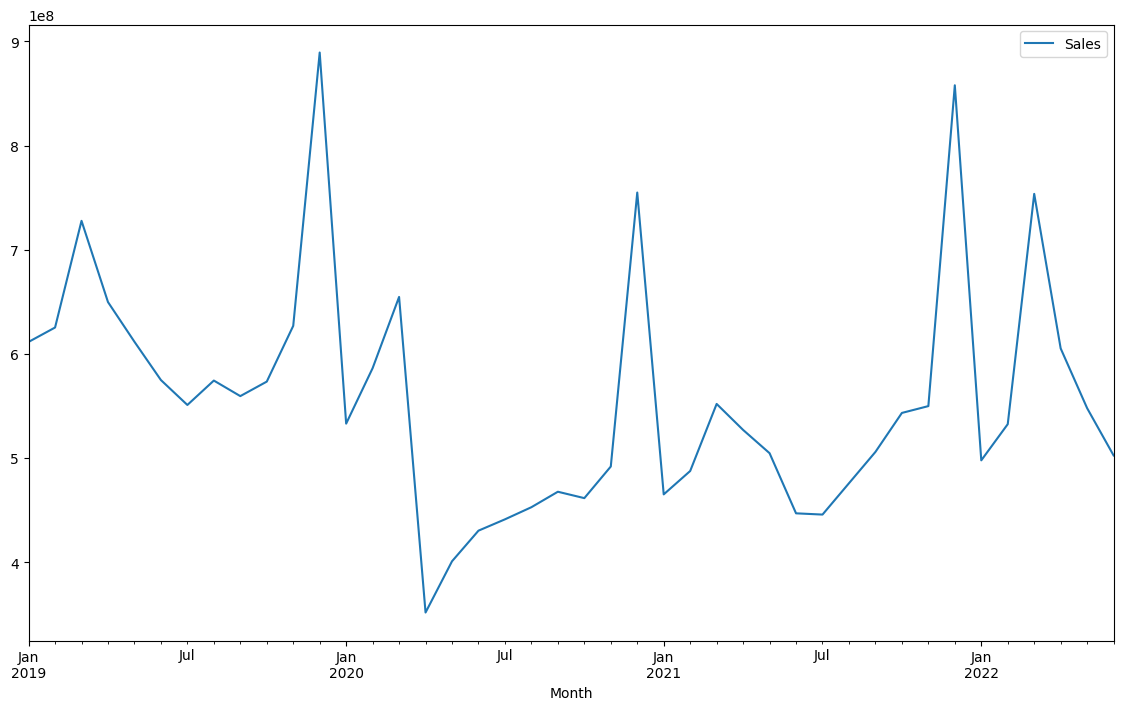

In [1416]:
df.plot(figsize=(14,8))


In [1417]:
adfuller(df['Sales'])

In [1418]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['Статистика теста ADF', 'P-значение', 'Используемые лаги', 'Критерий ADF']
    
    for value, label in zip(result, labels):
        print(f'{label}, {value}')

    if result[1]<=0.05:
        print('Данные стационарны')
    else:
        print('Данные не стационарны')

(-4.821488413501406,
 4.946542437323099e-05,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 1245.739920785457)

In [1419]:
adfuller_test(df['Sales'])

In [1420]:
df

Статистика теста ADF, -4.821488413501406
P-значение, 4.946542437323099e-05
Используемые лаги, 0
Критерий ADF, 41
Данные стационарны


In [1421]:
df['Sales'].shift(1)

,Sales
Month,
2019-01-01,6.116698e+08
2019-02-01,6.254852e+08
2019-03-01,7.278651e+08
2019-04-01,6.499091e+08
2019-05-01,6.118044e+08
2019-06-01,5.750736e+08
2019-07-01,5.511557e+08
2019-08-01,5.745834e+08
2019-09-01,5.596533e+08


In [1422]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

Month
2019-01-01             NaN
2019-02-01    6.116698e+08
2019-03-01    6.254852e+08
2019-04-01    7.278651e+08
2019-05-01    6.499091e+08
2019-06-01    6.118044e+08
2019-07-01    5.750736e+08
2019-08-01    5.511557e+08
2019-09-01    5.745834e+08
2019-10-01    5.596533e+08
2019-11-01    5.735714e+08
2019-12-01    6.270833e+08
2020-01-01    8.893998e+08
2020-02-01    5.332384e+08
2020-03-01    5.864687e+08
2020-04-01    6.548460e+08
2020-05-01    3.519605e+08
2020-06-01    4.011334e+08
2020-07-01    4.305238e+08
2020-08-01    4.413847e+08
2020-09-01    4.530366e+08
2020-10-01    4.678771e+08
2020-11-01    4.617411e+08
2020-12-01    4.920891e+08
2021-01-01    7.550166e+08
2021-02-01    4.653435e+08
2021-03-01    4.877776e+08
2021-04-01    5.521452e+08
2021-05-01    5.271996e+08
2021-06-01    5.048700e+08
2021-07-01    4.471601e+08
2021-08-01    4.459584e+08
2021-09-01    4.760269e+08
2021-10-01    5.060857e+08
2021-11-01    5.435085e+08
2021-12-01    5.500617e+08
2022-01-01    8.579605

In [1423]:
adfuller_test(df['Sales'])

In [1424]:
df.head()

Статистика теста ADF, -4.821488413501406
P-значение, 4.946542437323099e-05
Используемые лаги, 0
Критерий ADF, 41
Данные стационарны


In [1425]:
adfuller_test(df['Sales first diff.'].dropna())

,Sales,Sales first diff.
Month,,
2019-01-01,6.116698e+08,NaN
2019-02-01,6.254852e+08,1.381540e+07
2019-03-01,7.278651e+08,1.023798e+08
2019-04-01,6.499091e+08,-7.795598e+07
2019-05-01,6.118044e+08,-3.810472e+07


In [1426]:
df[['Sales first diff.']].plot(figsize=(12,8))

Статистика теста ADF, -8.297391554420797
P-значение, 4.1049024818680197e-13
Используемые лаги, 1
Критерий ADF, 39
Данные стационарны


<Axes: xlabel='Month'>

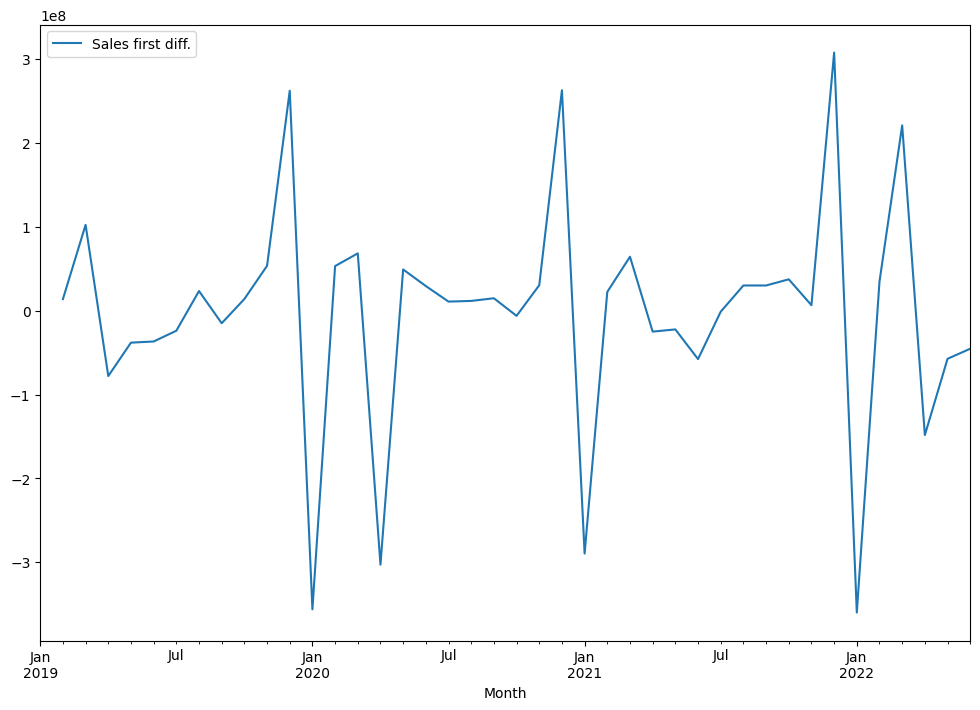

In [1427]:
# df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [1428]:
# adfuller_test(df['Seasonal first diff.'].dropna())

## Seasonal first diff

In [1429]:
# df[['Seasonal first diff.']].plot(figsize=(12,8))

In [1430]:
df.head(15)

In [1431]:
# fig = plt.figure(figsize = (12,8))
# ax1 = fig.add_subplot(211)
# fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=10, ax=ax1)
#
# ax2 = fig.add_subplot(212)
# fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=4, ax=ax2)

,Sales,Sales first diff.
Month,,
2019-01-01,6.116698e+08,NaN
2019-02-01,6.254852e+08,1.381540e+07
2019-03-01,7.278651e+08,1.023798e+08
2019-04-01,6.499091e+08,-7.795598e+07
2019-05-01,6.118044e+08,-3.810472e+07
2019-06-01,5.750736e+08,-3.673080e+07
2019-07-01,5.511557e+08,-2.391781e+07
2019-08-01,5.745834e+08,2.342769e+07
2019-09-01,5.596533e+08,-1.493012e+07


In [1432]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales first diff.'].iloc[13:], lags=12, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales first diff.'].iloc[13:], lags=12, ax=ax2)

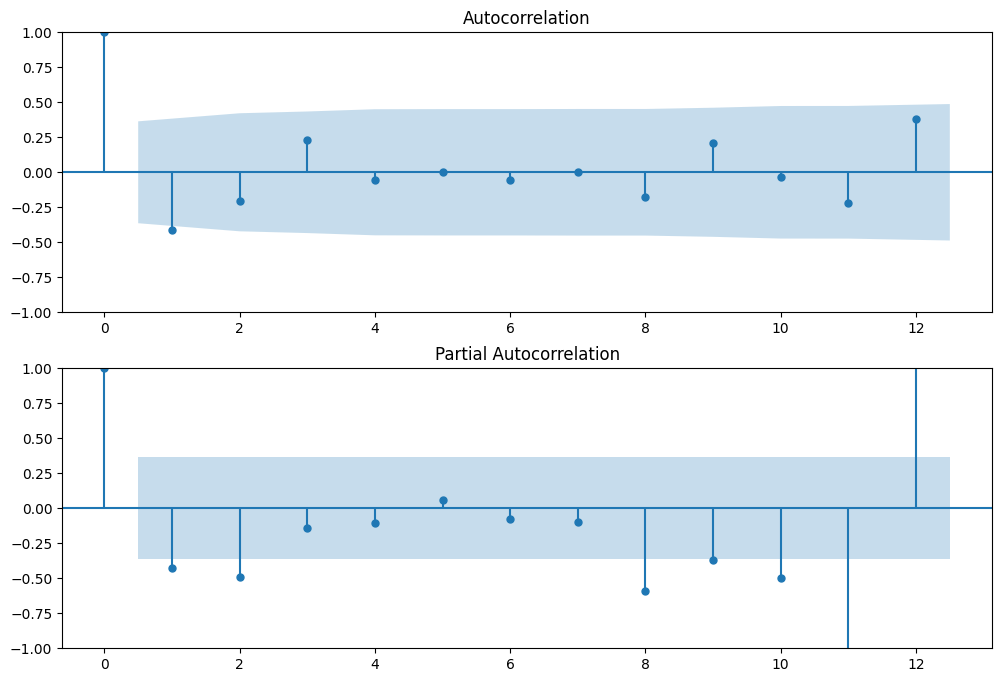

In [1433]:
model = ARIMA(df['Sales'], order=(1,1,1))

In [1434]:
model = model.fit()

In [1435]:
model.summary()

In [1436]:
df.shape

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -821.762
Date:                Sat, 29 Apr 2023   AIC                           1649.524
Time:                        22:36:49   BIC                           1654.665
Sample:                    01-01-2019   HQIC                          1651.396
                         - 06-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3951      0.158      2.493      0.013       0.084       0.706
ma.L1         -0.9891      0.209     -4.733      0.000      -1.399      -0.580
sigma2      1.563e+16   9.49e-18   1.65e+33      0.000    1.56e+16    1.56e+16
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.58   Prob(JB):                         0.12
Heteroskedasticity (H):               0.82   Skew:                             0.66
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.4e+48. Standard errors may be unstable.
"""

In [1437]:
df['forecast'] = model.predict(start=35, end=42, dynamic=True)

(42, 2)

In [1438]:
df.tail(20)

In [1439]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

,Sales,Sales first diff.,forecast
Month,,,
2020-11-01,4.920891e+08,3.034795e+07,NaN
2020-12-01,7.550166e+08,2.629275e+08,NaN
2021-01-01,4.653435e+08,-2.896731e+08,NaN
2021-02-01,4.877776e+08,2.243407e+07,NaN
2021-03-01,5.521452e+08,6.436765e+07,NaN
2021-04-01,5.271996e+08,-2.494566e+07,NaN
2021-05-01,5.048700e+08,-2.232959e+07,NaN
2021-06-01,4.471601e+08,-5.770991e+07,NaN
2021-07-01,4.459584e+08,-1.201634e+06,NaN


<Axes: xlabel='Month'>

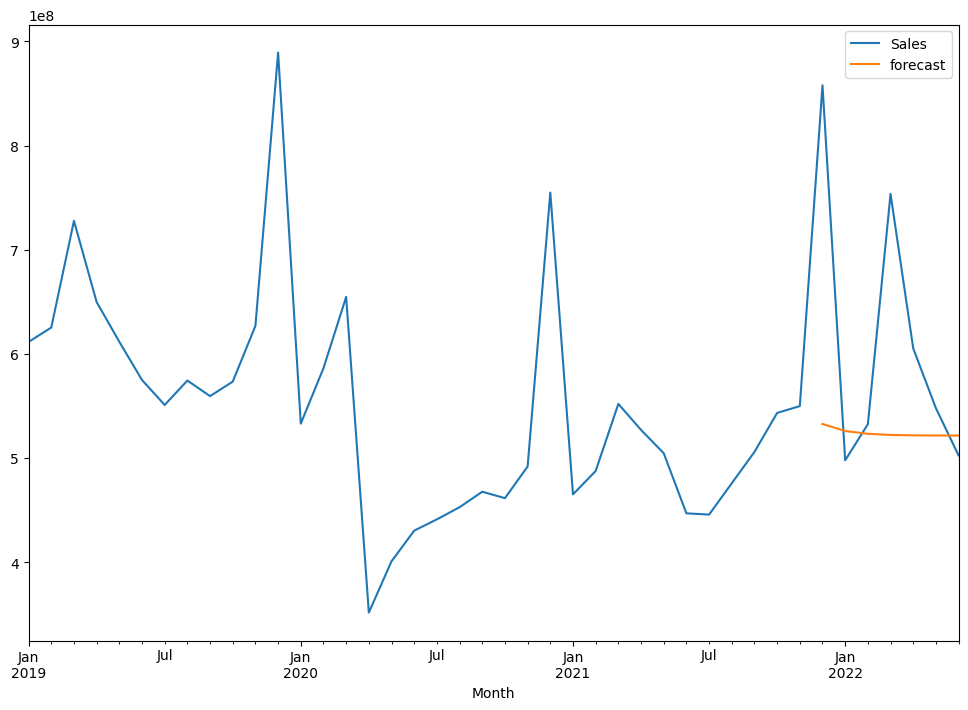

In [1440]:
# future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 12)]
# future_dates[1:]
# future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
# future_dataset.tail()
# future_df = pd.concat([df, future_dataset])
# future_df.shape
# future_df['forecast_ARIMA2'] = model.predict(start=41, end=44, dynamic=True)
# future_df[['Sales', 'forecast_ARIMA2']].plot(figsize=(12, 8))
# df.tail(20)

## Построение прогноза на 07 и 08 месяцы 2022г. Не сезонные

In [1441]:
# future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]
# future_dates[1:]
# future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
# future_dataset.tail()
# future_df = pd.concat([df, future_dataset])
# future_df.shape
# future_df['forecast_ARIMA2'] = model.predict(start=41, end=65, dynamic=True)
# future_df[['Sales', 'forecast_ARIMA2']].plot(figsize=(12, 8))
# df.tail(20)

## Бонус! Построение прогноза на последующие 2 года! =) Сезонные

In [1442]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
df['forecast_SARIMAX'] = results.predict(start=20, end=42, dynamic=True)
df.tail(20)

## Построение модели SARIMA

In [1443]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [1444]:
results = model.fit()

In [1445]:
df['forecast_SARIMAX'] = results.predict(start=20, end=42, dynamic=True)

In [1446]:
df.tail(20)

,Sales,Sales first diff.,forecast,forecast_SARIMAX
Month,,,,
2020-11-01,4.920891e+08,3.034795e+07,NaN,4.981696e+08
2020-12-01,7.550166e+08,2.629275e+08,NaN,7.224427e+08
2021-01-01,4.653435e+08,-2.896731e+08,NaN,5.092177e+08
2021-02-01,4.877776e+08,2.243407e+07,NaN,5.569276e+08
2021-03-01,5.521452e+08,6.436765e+07,NaN,6.309547e+08
2021-04-01,5.271996e+08,-2.494566e+07,NaN,3.595793e+08
2021-05-01,5.048700e+08,-2.232959e+07,NaN,3.959949e+08
2021-06-01,4.471601e+08,-5.770991e+07,NaN,4.156593e+08
2021-07-01,4.459584e+08,-1.201634e+06,NaN,4.213687e+08


<Axes: xlabel='Month'>

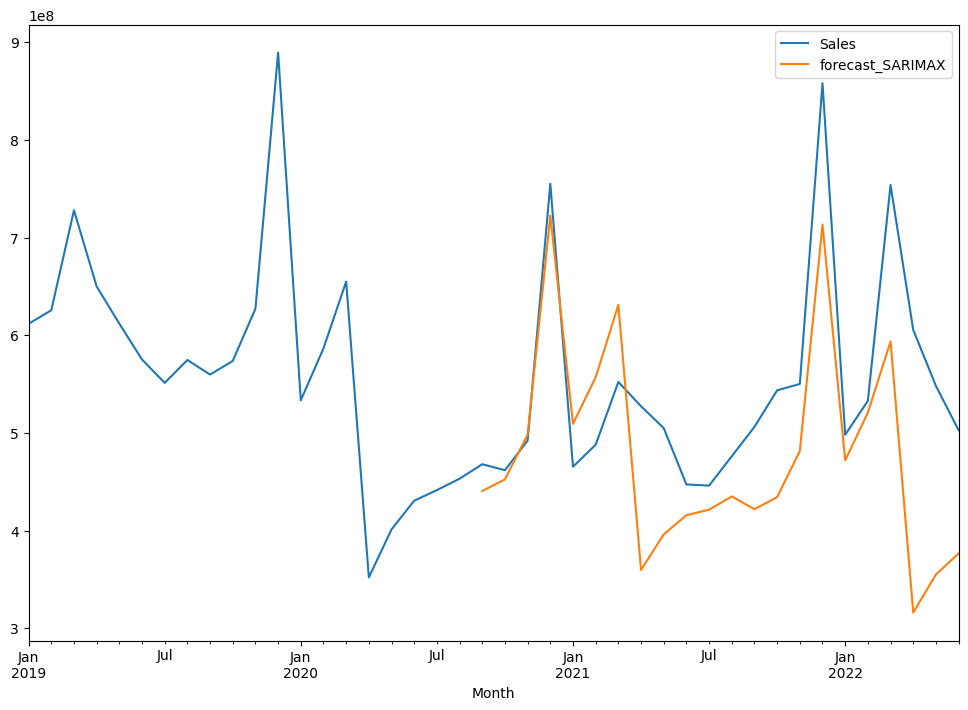

In [1447]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

## На графике видим, что модель SARIMAX показывает довольно точный прогноз, но видны расхождения

## Строим прогноз на будущие периоды

In [1448]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,3)]

In [1449]:
future_dates[1:]

[Timestamp('2022-07-01 00:00:00'), Timestamp('2022-08-01 00:00:00')]

In [1450]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [1451]:
future_dataset.tail()

,Sales,Sales first diff.,forecast,forecast_SARIMAX
2022-07-01,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN


In [1452]:
future_df = pd.concat([df, future_dataset])

In [1453]:
future_df.shape

(44, 4)

In [1454]:
future_df['forecast_SARIMAX2'] = results.predict(start=41, end=44, dynamic=True)

<Axes: >

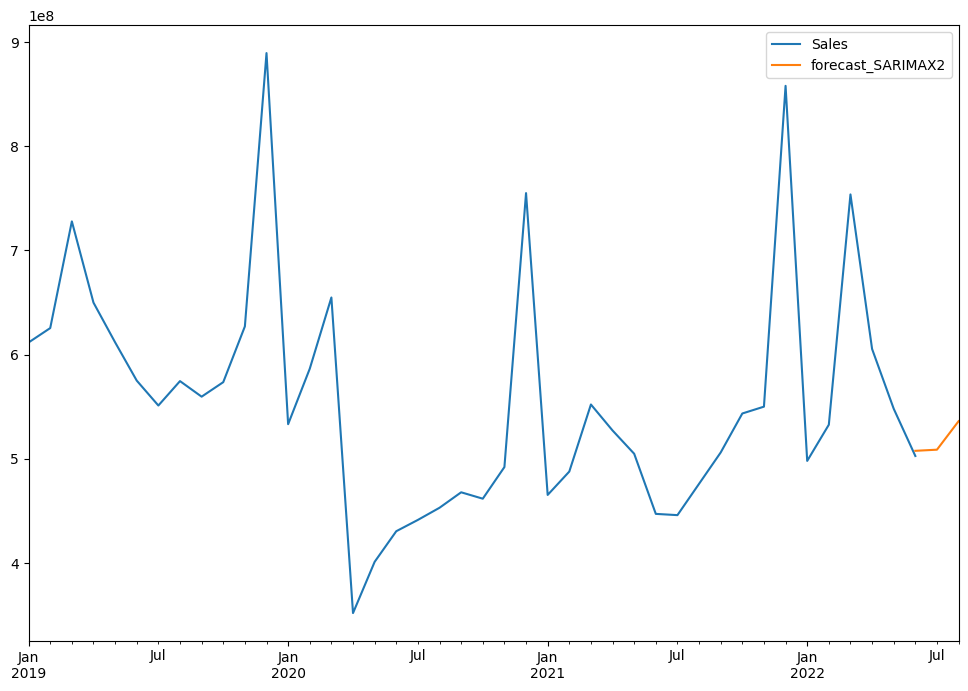

In [1455]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))

## Построение прогноза на 07 и 08 месяцы 2022г. Сезонные

<Axes: >

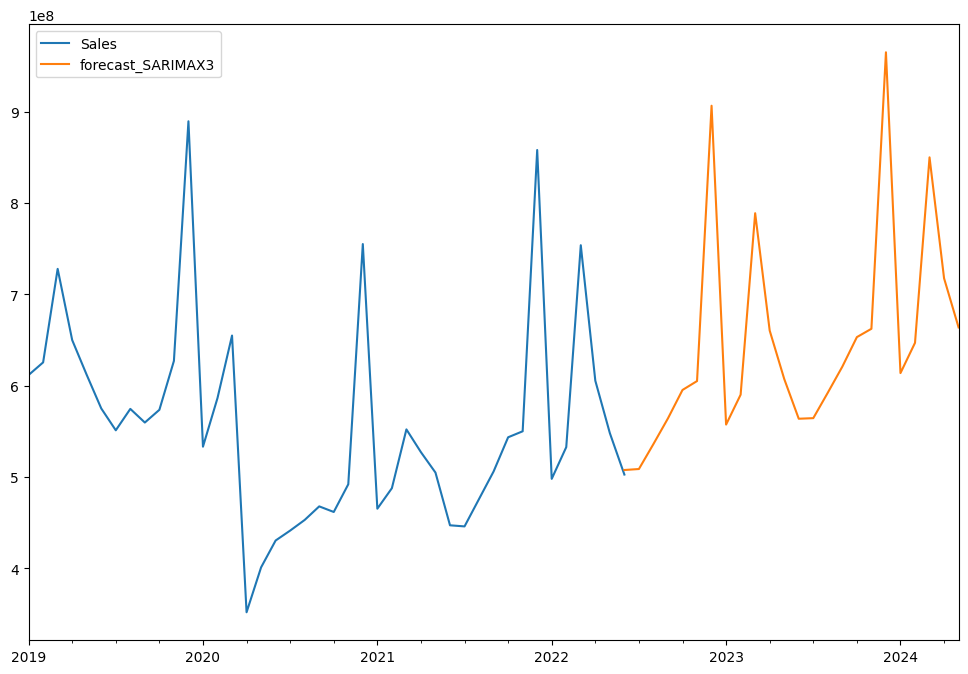

In [1456]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]
future_dates[1:]
future_dataset = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dataset.tail()
future_df = pd.concat([df, future_dataset])
future_df.shape
future_df['forecast_SARIMAX3'] = results.predict(start=41, end=65, dynamic=True)
future_df[['Sales', 'forecast_SARIMAX3']].plot(figsize=(12, 8))

## Бонус! Построение прогноза на последующие 2 года! =)

## Итог для построения прогноза была выбрана модель SARIMA. Её преимущество перед ARIMA состоит  в том, что она учитывает данные с внешними факторами (сезонность, праздники и тд.). В процессе проведения Теста Дики-Фуллера (ADF) мы увидели, что наши данные стационарны, то есть не зависят от сезона и от трендов и по факту мы могли бы обойтись моделью ARIMA.
## НО В апреле 2020 был резкий спад продаж (КОВИД), что сломало логику ARIMA и система подумала, что наши данные стационарны, хотя они имеют сезонность, которая была бы соблюдена, если бы не события 2020 (КОВИД).
## Модель SARIMAX имеет достаточно высокую точность прогноза, но, к сожалению, не может учитывать нестандартные внешние обстоятельства.